# 🌧️ Flood Prediction (NCR, Philippines) — Simple Machine Learning Notebook

<div align="center">

**Topic:** Flood Prediction using Rainfall, Water Level, and Elevation  
**Model:** Logistic Regression (Binary Classification)  
**Platform:** Google Colab  

</div>

---

## 📌 Quick Background (student write-up)
Flooding is a common concern in some areas of NCR, especially during heavy rainfall.  
In this activity, the proponents created a simple machine learning model that predicts if flooding will occur (**FloodOccurrence**) based on:

- **Rainfall_mm** (mm)  
- **WaterLevel_m** (m)  
- **Elevation_m** (m)

**Output**
- `0` = No Flood  
- `1` = Flood  

> Note: The dataset typically has **more “No Flood”** than “Flood”, so the notebook uses a basic imbalance handling technique.

---

## ✅ What this notebook covers (based on the given instructions)
A. Dataset Loading  
B. Preprocessing (missing values, scaling, train/test split)  
C. Logistic Regression Training  
D. Model Evaluation (Accuracy, Confusion Matrix, Precision/Recall/F1, ROC)  
E. Insights + Suggestions  
F. A simple function to predict from new inputs


## 1) ⚙️ Imports
This section imports the libraries used for data handling, training, and evaluation.

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    classification_report, confusion_matrix, ConfusionMatrixDisplay,
    roc_curve, auc
)

RANDOM_STATE = 123


## 2) 📂 Dataset Loading (Colab)

### How the proponents load the dataset:
1. Upload the cleaned dataset (`cleaned_data.csv`) into Colab.
2. Read the file using `pandas`.

✅ **Tip:** If the dataset name is different, just edit `CSV_PATH`.


In [2]:
# Upload dataset file here (recommended in Google Colab)
try:
    from google.colab import files
    uploaded = files.upload()
    print("Uploaded:", list(uploaded.keys()))
except Exception as e:
    print("Upload skipped or not running in Colab.")
    print("Info:", e)


Upload skipped or not running in Colab.
Info: No module named 'google'


In [3]:
# Set the dataset filename here (default = cleaned_data.csv)
CSV_PATH = "cleaned_data.csv"

df = pd.read_csv(CSV_PATH)
df.head()


,Rainfall_mm,WaterLevel_m,Elevation_m,FloodOccurrence
0,12.0,0.5,43.0,0
1,10.6,1.8,15.0,0
2,5.7,0.5,5.0,0
3,3.7,0.5,5.0,0
4,3.4,0.5,43.0,0


## 3) 🔍 Quick Dataset Check

The proponents checked the following:
- dataset size
- column names
- missing values
- target distribution (to see if there is imbalance)


In [4]:
print("Shape:", df.shape)
print("\nColumns:", df.columns.tolist())

print("\nMissing values per column:")
display(df.isna().sum())

if "FloodOccurrence" in df.columns:
    print("\nFloodOccurrence counts:")
    display(df["FloodOccurrence"].value_counts())

    print("\nFloodOccurrence ratio:")
    display(df["FloodOccurrence"].value_counts(normalize=True))
else:
    print("⚠️ FloodOccurrence column was not found. Please check the dataset.")


Shape: (4442, 4)

Columns: ['Rainfall_mm', 'WaterLevel_m', 'Elevation_m', 'FloodOccurrence']

Missing values per column:


Rainfall_mm        0
WaterLevel_m       0
Elevation_m        0
FloodOccurrence    0
dtype: int64


FloodOccurrence counts:


FloodOccurrence
0    4311
1     131
Name: count, dtype: int64


FloodOccurrence ratio:


FloodOccurrence
0    0.970509
1    0.029491
Name: proportion, dtype: float64

## 4) 🧼 Preprocessing

Based on the task instructions, preprocessing should include:

✅ **Handle missing values**  
✅ **Feature scaling** (StandardScaler recommended)  
✅ **Train–test split**

### Why scaling?
Rainfall values can be much larger (mm) compared to elevation and water level (meters).  
Scaling helps Logistic Regression train more consistently.

### Why imbalance handling?
Flood events are often fewer than non-flood events.  
So the proponents used:
- `class_weight="balanced"`


In [5]:
FEATURES = ["Rainfall_mm", "WaterLevel_m", "Elevation_m"]
TARGET = "FloodOccurrence"

missing_cols = [c for c in FEATURES + [TARGET] if c not in df.columns]
if missing_cols:
    raise ValueError(f"Missing required columns: {missing_cols}")

X = df[FEATURES].copy()
y = df[TARGET].copy()

# Train-test split (required format from instructions)
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=RANDOM_STATE,
    stratify=y
)

print("Train shape:", X_train.shape)
print("Test shape :", X_test.shape)


Train shape: (3553, 3)
Test shape : (889, 3)


### 4.1 Preprocessing + Model Pipeline

To keep the workflow organized, the proponents used a pipeline:

1. Median Imputation (for missing values)
2. StandardScaler (feature scaling)
3. Logistic Regression (classification model)


In [6]:
pipeline = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler()),
    ("model", LogisticRegression(
        max_iter=1000,
        class_weight="balanced",
        random_state=RANDOM_STATE
    ))
])

pipeline


,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('imputer', ...), ('scaler', ...), ...]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"missing_values missing_values: int, float, str, np.nan, None or pandas.NA, default=np.nanThe placeholder for the missing values. All occurrences of`missing_values` will be imputed. For pandas' dataframes withnullable integer dtypes with missing values, `missing_values`can be set to either `np.nan` or `pd.NA`.",nan
,"strategy strategy: str or Callable, default='mean'The imputation strategy.- If ""mean"", then replace missing values using the mean along each column. Can only be used with numeric data.- If ""median"", then replace missing values using the median along each column. Can only be used with numeric data.- If ""most_frequent"", then replace missing using the most frequent value along each column. Can be used with strings or numeric data. If there is more than one such value, only the smallest is returned.- If ""constant"", then replace missing values with fill_value. Can be used with strings or numeric data.- If an instance of Callable, then replace missing values using the scalar statistic returned by running the callable over a dense 1d array containing non-missing values of each column... versionadded:: 0.20 strategy=""constant"" for fixed value imputation... versionadded:: 1.5 strategy=callable for custom value imputation.",'median'
,"fill_value fill_value: str or numerical value, default=NoneWhen strategy == ""constant"", `fill_value` is used to replace alloccurrences of missing_values. For string or object data types,`fill_value` must be a string.If `None`, `fill_value` will be 0 when imputing numericaldata and ""missing_value"" for strings or object data types.",None
,"copy copy: bool, default=TrueIf True, a copy of X will be created. If False, imputation willbe done in-place whenever possible. Note that, in the following cases,a new copy will always be made, even if `copy=False`:- If `X` is not an array of floating values;- If `X` is encoded as a CSR matrix;- If `add_indicator=True`.",True
,"add_indicator add_indicator: bool, default=FalseIf True, a :class:`MissingIndicator` transform will stack onto outputof the imputer's transform. This allows a predictive estimatorto account for missingness despite imputation. I

## 5) 🤖 Model Training (Logistic Regression)

In this step, the model learns from the training data to predict FloodOccurrence.


In [7]:
pipeline.fit(X_train, y_train)
print("✅ Model training finished.")


✅ Model training finished.


## 6) 📊 Model Evaluation

For Logistic Regression, the required evaluation metrics are:

- **Accuracy**
- **Confusion Matrix**
- **Precision, Recall, F1-score**
- (Optional) ROC Curve

> Since flood prediction is a safety-related case, the proponents focused more on **Recall** (catching flood cases).


In [8]:
y_pred = pipeline.predict(X_test)
y_proba = pipeline.predict_proba(X_test)[:, 1]

acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, zero_division=0)
rec = recall_score(y_test, y_pred, zero_division=0)
f1 = f1_score(y_test, y_pred, zero_division=0)

print(f"Accuracy : {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall   : {rec:.4f}")
print(f"F1-score : {f1:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred, digits=4, zero_division=0))


Accuracy : 0.9899
Precision: 0.7429
Recall   : 1.0000
F1-score : 0.8525

Classification Report:
              precision    recall  f1-score   support

           0     1.0000    0.9896    0.9948       863
           1     0.7429    1.0000    0.8525        26

    accuracy                         0.9899       889
   macro avg     0.8714    0.9948    0.9236       889
weighted avg     0.9925    0.9899    0.9906       889



### 6.1 Confusion Matrix

- **TN**: correct No Flood
- **FP**: false alarm (predicted flood but no flood)
- **FN**: missed flood (most critical)
- **TP**: correct Flood


Confusion Matrix:
 [[854   9]
 [  0  26]]


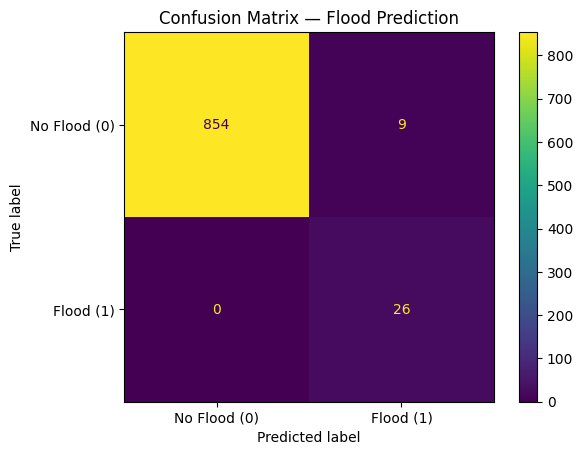

In [9]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No Flood (0)", "Flood (1)"])
disp.plot(values_format="d")
plt.title("Confusion Matrix — Flood Prediction")
plt.show()


### 6.2 ROC Curve (Optional)

ROC curve helps visualize how well the model separates flood vs no-flood cases.


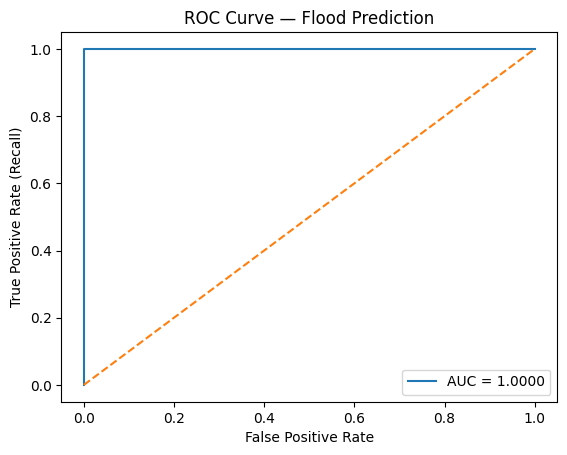

In [10]:
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.4f}")
plt.plot([0, 1], [0, 1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (Recall)")
plt.title("ROC Curve — Flood Prediction")
plt.legend(loc="lower right")
plt.show()


## 7) 🧠 Insights (3–5) 🧠

Below are sample insights written in a student-friendly way.  
(Students can revise depending on their final metrics.)

1. The dataset shows **class imbalance**, so `class_weight="balanced"` was applied to help the model detect flood cases better.  
2. Using **StandardScaler** improved training stability because features have different ranges and units.  
3. **Recall** is important because missing a flood (false negative) can be more risky than a false alarm.  
4. Rainfall and water level generally increase flood probability, while elevation may affect flood susceptibility.  
5. The model can still be improved by adding more features (e.g., soil moisture, location, seasonal variables) and tuning the threshold.


### 7.1 Feature Influence (Optional Interpretation)

This prints coefficients to see which features push the prediction toward flood (positive coefficient) or no flood (negative coefficient).


In [11]:
model = pipeline.named_steps["model"]
coefs = model.coef_[0]

coef_table = pd.DataFrame({
    "Feature": FEATURES,
    "Coefficient": coefs,
    "Odds_Ratio (exp(coef))": np.exp(coefs)
}).sort_values("Coefficient", ascending=False)

display(coef_table)


,Feature,Coefficient,Odds_Ratio (exp(coef))
0,Rainfall_mm,8.444636,4650.063857
1,WaterLevel_m,0.165592,1.180091
2,Elevation_m,0.070922,1.073497


## 8) Predict Flood From New Inputs

This function is useful for the final presentation:
- Input rainfall, water level, elevation
- Output probability + predicted label

The threshold can be adjusted:
- Default: 0.50
- Lower threshold: catches more floods (higher recall) but more false alarms


In [12]:
def predict_flood(rainfall_mm: float, waterlevel_m: float, elevation_m: float, threshold: float = 0.50):
    new_data = pd.DataFrame([{
        "Rainfall_mm": rainfall_mm,
        "WaterLevel_m": waterlevel_m,
        "Elevation_m": elevation_m
    }])

    prob_flood = pipeline.predict_proba(new_data)[0][1]
    pred = int(prob_flood >= threshold)

    return {
        "Flood_Probability": float(prob_flood),
        "Predicted_Class": pred,
        "Meaning": "FLOOD" if pred == 1 else "NO FLOOD",
        "Threshold_Used": threshold
    }

# Sample demo values
print(predict_flood(rainfall_mm=40, waterlevel_m=1.2, elevation_m=12))
print(predict_flood(rainfall_mm=120, waterlevel_m=2.8, elevation_m=8))
print(predict_flood(rainfall_mm=80, waterlevel_m=2.0, elevation_m=10, threshold=0.35))


{'Flood_Probability': 0.9999969028833152, 'Predicted_Class': 1, 'Meaning': 'FLOOD', 'Threshold_Used': 0.5}
{'Flood_Probability': 1.0, 'Predicted_Class': 1, 'Meaning': 'FLOOD', 'Threshold_Used': 0.5}
{'Flood_Probability': 1.0, 'Predicted_Class': 1, 'Meaning': 'FLOOD', 'Threshold_Used': 0.35}


---  
## ✅ End of Notebook
---

